In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

char_df = pd.read_csv("data\Skyrim_Named_Characters.csv")
char_df.head()

,Source,Name,Home City,House,Race,Gender,Level,Class,RefID,BaseID,...,Protected,Perks,Marry,StewardHF,Horses,Added by,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10)
0,https://en.uesp.net/wiki/Skyrim:Beitild,Beitild,Dawnstar,Beitild's House,Nord,Female,6,Miner,0001A6B6,00013612,...,No,NaN,No,No,NaN,Vanilla,6.0,91.0,67.0,67.0
1,https://en.uesp.net/wiki/Skyrim:Brina_Merilis,Brina Merilis,Dawnstar,Brina's House,Nord,Female,PC×1 (range=10-25),Warrior,0001A6B8,0001A6B7,...,No,NaN,No,No,NaN,Vanilla,10.0,155.3,50.0,79.7
2,https://en.uesp.net/wiki/Skyrim:Horik_Halfhand,Horik Halfhand,Dawnstar,Brina's House,Nord,Male,PC×1 (range=10-25),Warrior,0001A6BA,0001A6B9,...,No,NaN,No,No,NaN,Vanilla,10.0,155.3,50.0,79.7
3,https://en.uesp.net/wiki/Skyrim:Dawnstar_Guard,Dawnstar Guard,NaN,NaN,Nord,Male,PCx1 (Range=20-50),Warrior,NaN,0002D794,...,No,NaN,No,No,NaN,Vanilla,20.0,NaN,NaN,NaN
4,https://en.uesp.net/wiki/Skyrim:Babette,Babette,NaN,NaN,Breton,Female,10,Assassin,0001D4BC,0001D4B7,...,No,NaN,No,No,NaN,Vanilla,10.0,125.0,15.0,95.0


In [34]:
race_stats = pd.read_csv("data\skyrimstats.csv").drop(columns=["Unnamed: 0"])
race_stats = race_stats.replace("Altmer (High Elf)", "High Elf")
race_stats = race_stats.replace("Bosmer (Wood Elf)", "Wood Elf")
race_stats = race_stats.replace("Dunmer (Dark Elf)", "Dark Elf")
race_stats = race_stats.replace("Orsimer (Orc)", "Orc")

for i in race_stats:
    race_stats = race_stats.rename(columns={i:"base_"+i+"_race"})
    
race_stats = race_stats.rename(columns={"base_Race_race":"Race"})
race_stats

,Race,base_Smithing_race,base_Heavy Armor_race,base_Block_race,base_Two-Handed_race,base_One-Handed_race,base_Archery_race,base_Light Armor_race,base_Sneak_race,base_Lockpicking_race,base_Pickpocket_race,base_Speech_race,base_Alchemy_race,base_Illusion_race,base_Conjuration_race,base_Destruction_race,base_Restoration_race,base_Alteration_race,base_Enchanting_race
0,High Elf,15,15,15,15,15,15,15,15,15,15,15,15,25,20,20,20,20,20
1,Argonian,15,15,15,15,15,15,20,20,25,20,15,15,15,15,15,20,20,15
2,Wood Elf,15,15,15,15,15,25,20,20,20,20,15,20,15,15,15,15,15,15
3,Breton,15,15,15,15,15,15,15,15,15,15,20,20,20,25,15,20,20,15
4,Dark Elf,15,15,15,15,15,15,20,20,15,15,15,20,20,15,25,15,20,15
5,Imperial,15,20,20,15,20,15,15,15,15,15,15,15,15,15,20,25,15,20
6,Khajiit,15,15,15,15,20,20,15,25,20,20,15,20,15,15,15,15,15,15
7,Nord,20,15,20,25,20,15,20,15,15,15,20,15,15,15,15,15,15,15
8,Orc,20,25,20,20,20,15,15,15,15,15,15,15,15,15,15,15,15,20
9,Redguard,20,15,20,15,25,20,15,15,15,15,15,15,15,15,20,15,20,15


In [35]:
char_data = char_df.merge(race_stats,on="Race",how="inner")
char_data.head()

,Source,Name,Home City,House,Race,Gender,Level,Class,RefID,BaseID,...,base_Lockpicking_race,base_Pickpocket_race,base_Speech_race,base_Alchemy_race,base_Illusion_race,base_Conjuration_race,base_Destruction_race,base_Restoration_race,base_Alteration_race,base_Enchanting_race
0,https://en.uesp.net/wiki/Skyrim:Beitild,Beitild,Dawnstar,Beitild's House,Nord,Female,6,Miner,0001A6B6,00013612,...,15,15,20,15,15,15,15,15,15,15
1,https://en.uesp.net/wiki/Skyrim:Brina_Merilis,Brina Merilis,Dawnstar,Brina's House,Nord,Female,PC×1 (range=10-25),Warrior,0001A6B8,0001A6B7,...,15,15,20,15,15,15,15,15,15,15
2,https://en.uesp.net/wiki/Skyrim:Horik_Halfhand,Horik Halfhand,Dawnstar,Brina's House,Nord,Male,PC×1 (range=10-25),Warrior,0001A6BA,0001A6B9,...,15,15,20,15,15,15,15,15,15,15
3,https://en.uesp.net/wiki/Skyrim:Dawnstar_Guard,Dawnstar Guard,NaN,NaN,Nord,Male,PCx1 (Range=20-50),Warrior,NaN,0002D794,...,15,15,20,15,15,15,15,15,15,15
4,https://en.uesp.net/wiki/Skyrim:Dark_Brotherho...,Dark Brotherhood Initiate,NaN,NaN,Nord,Male,PC×1 (range=10-100),Assassin,00015D07,00015CFA,...,15,15,20,15,15,15,15,15,15,15


In [36]:
filtered = char_data[['Race', 'Gender', 'Class', 'Health', 'Magicka', 'Stamina',
       'Morality', 'Aggression', 'Essential',
        'Level (PC=10)', 'Health (PC=10)',
       'Magicka (PC=10)', 'Stamina (PC=10)','Perks']]



In [37]:
#if NPC has perk, returns 1 else return 0
def replace_str(df):
    
    if type(df["Perks"]) == str:
        return 1
    else:
        return 0
    
    
filtered["Perks"] = filtered.apply(replace_str,axis=1)


<ipython-input-37-1ba80c4cd5c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Perks"] = filtered.apply(replace_str,axis=1)


In [38]:
#cleans up "Essential" columns to replace values under "Yes"
def clean(df):
    
    if "Yes" in df["Essential"]:
        return df["Essential"].split()[0][:3]
    elif "No" in df["Essential"]:
        return "No"
    else:
        return df["Essential"]
    
filtered["Essential"] = filtered.apply(clean,axis=1)

filtered

<ipython-input-38-3f92fa96e1c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Essential"] = filtered.apply(clean,axis=1)


,Race,Gender,Class,Health,Magicka,Stamina,Morality,Aggression,Essential,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10),Perks
0,Nord,Female,Miner,91,67,67,No Crime,Unaggressive,No,6.0,91.0,67.0,67.0,0
1,Nord,Female,Warrior,50+(PC-1)×11.7,50,50+(PC-1)×3.3,No Crime,Unaggressive,Yes,10.0,155.3,50.0,79.7,0
2,Nord,Male,Warrior,50+(PC-1)×11.7,50,50+(PC-1)×3.3,No Crime,Unaggressive,Yes,10.0,155.3,50.0,79.7,0
3,Nord,Male,Warrior,NaN,NaN,NaN,Indeterminate,Indeterminate,No,20.0,NaN,NaN,NaN,0
4,Nord,Male,Assassin,175-925,65-215,95-545,Any Crime,Aggressive,Yes,10.0,550.0,140.0,320.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Khajiit,Male,Bandit,35-489,25,70-246,No Crime,Unaggressive,No,13.0,262.0,25.0,158.0,0
932,Khajiit,Male,Spellsword,50+(PC-1.2)×10,50+(PC-1.2)×4,50+(PC-1.2)×4,No Crime,Aggressive,No,12.0,138.0,85.2,85.2,0
933,Khajiit,Male,Citizen,75,60,60,No Crime,Aggressive,No,4.0,75.0,60.0,60.0,0
934,Khajiit,Male,Bandit,1,25,90,Any Crime,Aggressive,No,1.0,1.0,25.0,90.0,0


<AxesSubplot:xlabel='Gender', ylabel='count'>

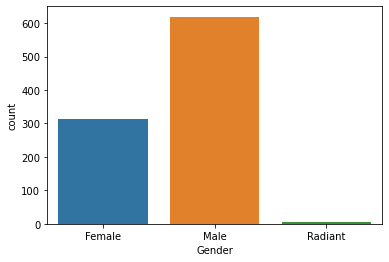

In [48]:
sns.countplot(x=filtered["Gender"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

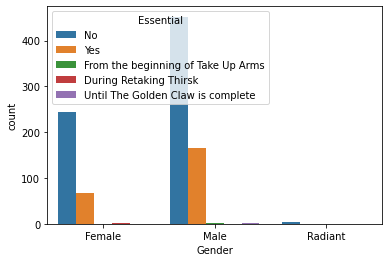

In [49]:
sns.countplot(data=filtered, x="Gender", hue="Essential")

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


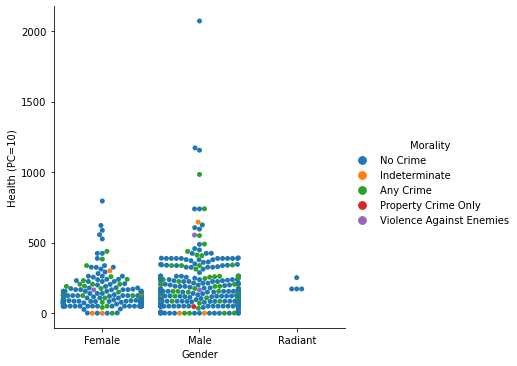

In [50]:
sns.catplot(data=filtered, x="Gender", y="Health (PC=10)",hue="Morality",kind="swarm")

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


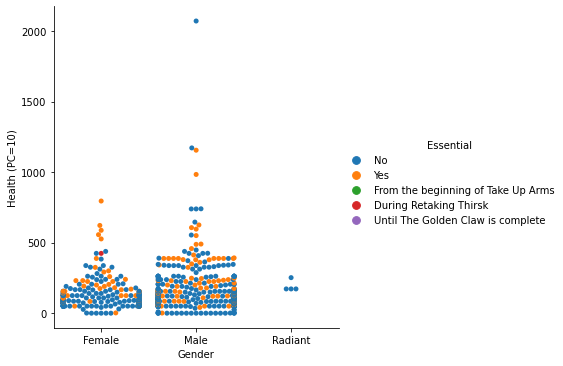

In [51]:
sns.catplot(data=filtered, x="Gender", y="Health (PC=10)",hue="Essential",kind="swarm")

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


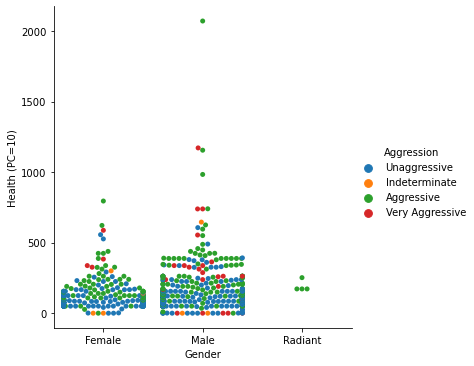

In [52]:
sns.catplot(data=filtered, x="Gender", y="Health (PC=10)",hue="Aggression",kind="swarm")